# Bandes électroniques (Justin Harvengt : ScSbPd)

## Import

In [119]:
import numpy as np
import itertools
from matplotlib import pyplot as plt
from mp_api.client import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.core import Spin
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Données

In [120]:
mp_key = "XJhzTsEnBSh1B3Uh2ARw9cKQZuE9Q90J"
mp_id = "mp-569779"

In [121]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
    el_dos = m.get_dos_by_material_id(mp_id)    

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## 1) Détermination de la bande interdite

### Plot énergie en fonction de la longueur d'onde

Informations sur la bande interdite :
 {'direct': False, 'energy': 0.015500000000000291, 'transition': '\\Gamma-(0.495,-0.000,0.495)'} 

Valeur de l'énergie de bande interdite :
 0.015500000000000291 [eV]


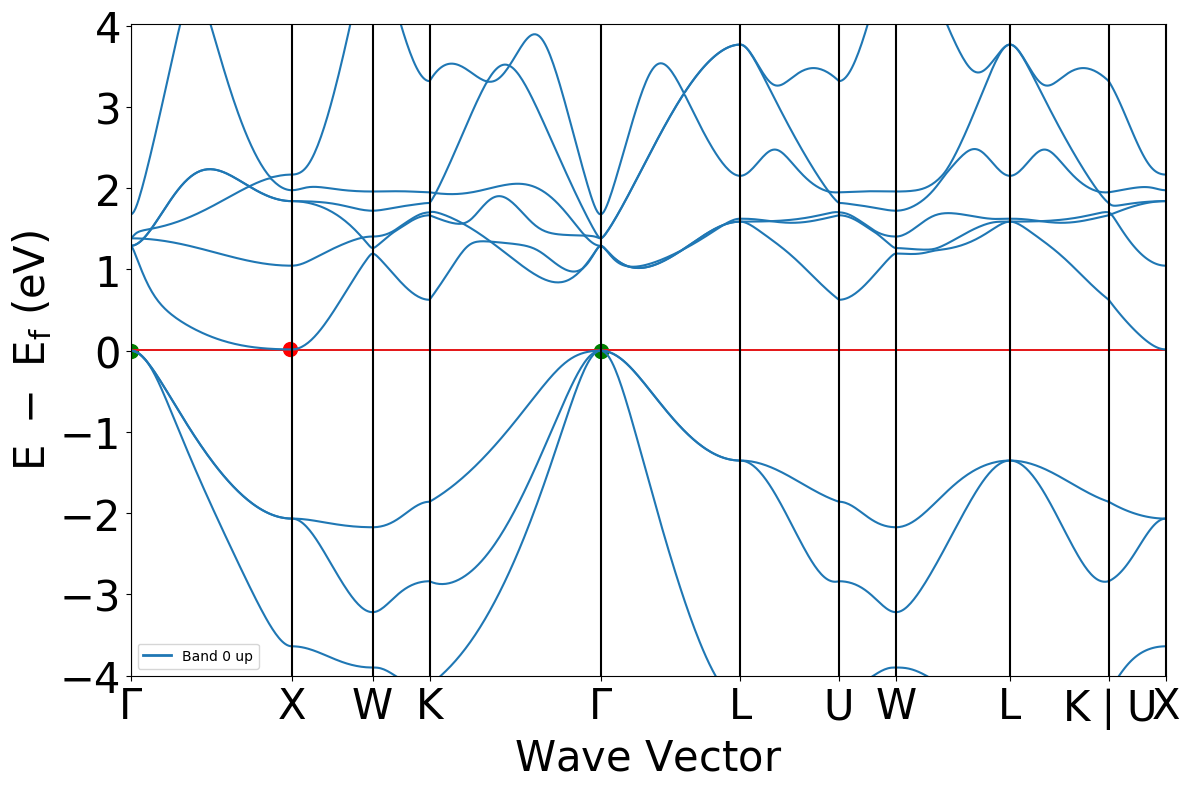

In [122]:
# Informations sur la bande interdite
print("Informations sur la bande interdite :\n", el_bs.get_band_gap(), "\n")
# Valeur de l'énergie de bande interdite
bg_energy = el_bs.get_band_gap()['energy']
print("Valeur de l'énergie de bande interdite :\n", bg_energy, "[eV]")

# Plot de l'énergie en fonction de la longueur d'onde
fig_el_bs = get_plot_bs(el_bs, plot_range=[-4,7])
fig_el_bs.show()

# Visualiser la bande interdite (autrement)
bsp = BSPlotter(el_bs)
plot_data = BSPlotter(el_bs).bs_plot_data()
data = plot_data.get('ticks').get('distance')
bsp.get_plot(vbm_cbm_marker=True)
plt.fill_between(np.linspace(data[0], data[-1], 400), 0, b_energy)

## 2) Directions de dispersion

### Première bande de conduction

In [123]:
# énergie de la première bande de conduction
E_cond = el_bs.get_cbm()['energy']

# numéro de la première bande de conduction
num_cond = el_bs.get_cbm()['band_index'][Spin.up][0]
print("Numéro de la première bande de conduction :", num_cond)

Numéro de la première bande de conduction : 13


### Dernière bande de valence

In [124]:
# Energie de la dernière bande de valence
E_val = el_bs.get_vbm()['energy']

# Numéro de la dernière bande de valence
num_val = el_bs.get_vbm()['band_index'][Spin.up][2]
print("Numéro de la dernière bande de valence :", num_val)

Numéro de la dernière bande de valence : 12


### Calcul des directions de dispersion

La pente correspondant à la dispersion maximale de la première bande de conduction vaut 2.3938549812327037 , 
sa direction est X ( 1 ) vers W ( 2 ), représenté en jaune sur le graphe


La pente correspondant à la dispersion minimale de la première bande de conduction vaut -1.752416687625791 , 
sa direction est K|U ( 9 ) vers X ( 10 ), représenté en vert sur le graphe


La pente correspondant à la dispersion maximale de la dernière bande de valence vaut 1.779016296643545 , 
sa direction est K ( 3 ) vers Γ ( 4 ), représenté en bleu sur le graphe


La pente correspondant à la dispersion minimale de la dernière bande de valence vaut -2.0973124911885326 , 
sa direction est Γ ( 0 ) vers L ( 1 ), représenté en rouge sur le graphe


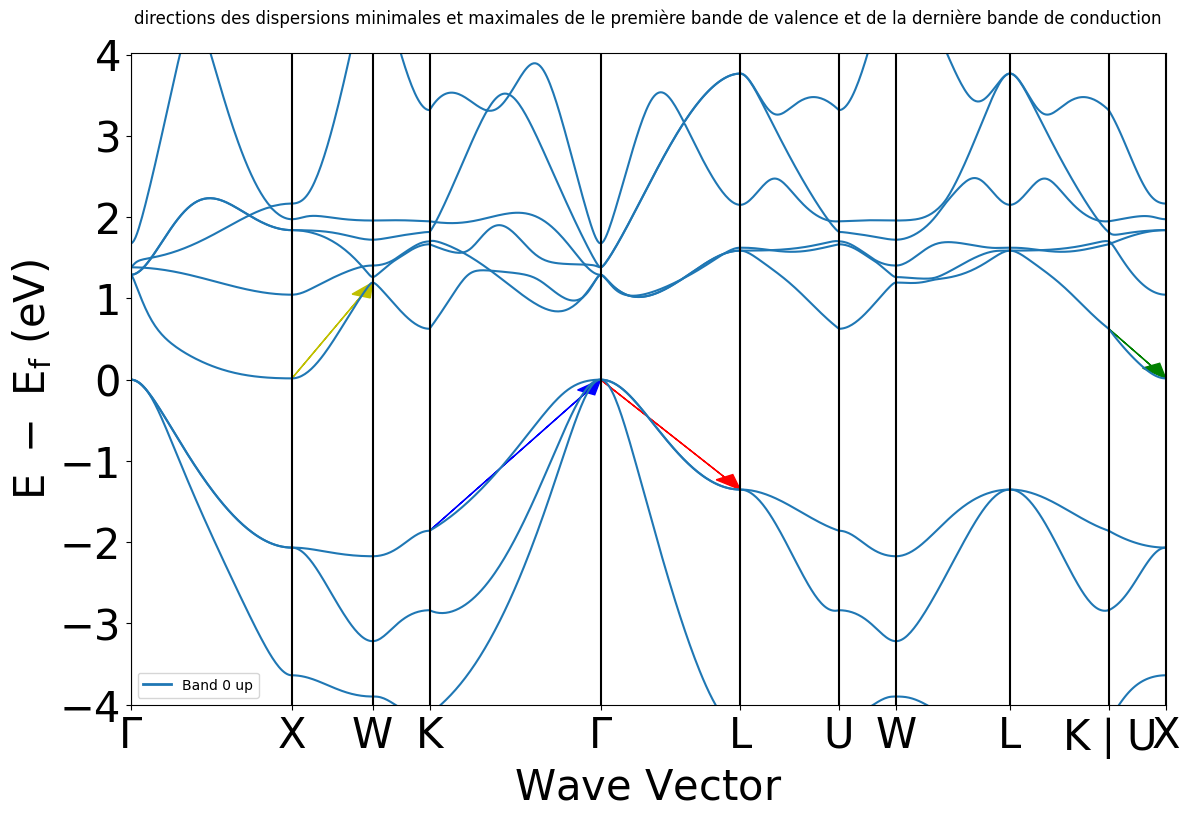

In [125]:
# Vecteur des abscisses
absc_vector = np.unique(data) 
# Matrice des énergies des différentes bandes
bands_energies = plot_data['energy']['1'] 

# Vecteurs de dispersion
cond_disp = np.zeros(10)
val_disp = np.zeros(10)

# Boucle qui remplit les vecteurs cond_disp et val_disp
for i in range(10):
    diff_absc= absc_vector[i+1]-absc_vector[i]
    cond_disp[i] = (bands_energies[i][num_cond][-1] - bands_energies[i][num_cond][0]) / diff_absc
    val_disp[i] = (bands_energies[i][num_val][-1] - bands_energies[i][num_val][0]) / diff_absc
    

print("La pente correspondant à la dispersion maximale de la première bande de conduction vaut" , cond_disp[np.argmax(cond_disp)] ,
      ", \nsa direction est X (" ,np.argmax(cond_disp), ") vers W (" ,np.argmax(cond_disp)+1, "), représenté en jaune sur le graphe")
print("\n")
print("La pente correspondant à la dispersion minimale de la première bande de conduction vaut" , cond_disp[np.argmin(cond_disp)] ,
      ", \nsa direction est K|U (" ,np.argmin(cond_disp), ") vers X (" ,np.argmin(cond_disp)+1, "), représenté en vert sur le graphe")
print("\n")
print("La pente correspondant à la dispersion maximale de la dernière bande de valence vaut" , val_disp[np.argmax(val_disp)] ,
      ", \nsa direction est K (" ,np.argmax(val_disp), ") vers Γ (" ,np.argmax(val_disp)+1, "), représenté en bleu sur le graphe")
print("\n")
print("La pente correspondant à la dispersion minimale de la dernière bande de valence vaut" , val_disp[np.argmin(val_disp)] ,
      ", \nsa direction est Γ (" ,np.argmin(val_disp), ") vers L (" ,np.argmin(val_disp)+1, "), représenté en rouge sur le graphe")

# Graphe avec directions de dispersion
bsp.get_plot()
plt.title("directions des dispersions minimales et maximales de le première bande de valence et de la dernière bande de conduction\n")
plt.arrow(absc_vector[4], bands_energies[4][num_val][0], absc_vector[4+1]-absc_vector[4],bands_energies[4][num_val][-1] - bands_energies[4][num_val][0] ,color = 'r',head_width = 0.12,length_includes_head=True) 
plt.arrow(absc_vector[3], bands_energies[3][num_val][0], absc_vector[3+1]-absc_vector[3],bands_energies[3][num_val][-1] - bands_energies[3][num_val][0] , color = 'b', head_width = 0.12,length_includes_head=True) 
plt.arrow(absc_vector[1], bands_energies[1][num_cond][0], absc_vector[1+1]-absc_vector[1],bands_energies[1][num_cond][-1] - bands_energies[1][num_cond][0] , color = 'y', head_width = 0.12,length_includes_head=True) 
plt.arrow(absc_vector[9], bands_energies[9][num_cond][0], absc_vector[9+1]-absc_vector[9],bands_energies[9][num_cond][-1] - bands_energies[9][num_cond][0] , color = 'g', head_width = 0.12,length_includes_head=True) 
plt.show()

## 3) Masse effective

In [126]:
# Constante de PLanck
h = 6.62607015e-34 
# eV <--> Joules
eV = 1.6022e-19
# hbar
h_bar = h/(2*np.pi)

k_cond = el_bs.get_cbm()['kpoint'].frac_coords*1e10
k_val = el_bs.get_vbm()['kpoint'].frac_coords*1e10

# Calculs des masses effectives via la formule vue en cours (en supposant une dispersion PARABOLIQUE!)
masse_cond = (h_bar**2 * (k_cond[0]**2+k_cond[1]**2+k_cond[2]**2))/(2*E_cond*eV)
print('Masse effective à la base de la première bande de conduction ' + str(masse_cond)+' [kg]\n')

masse_val = (h_bar**2 * (k_val[0]**2+k_val[1]**2+k_val[2]**2))/(2*abs(E_val)*eV)
print('Masse effective au sommet de la dernière bande de valence vaut ' + str(masse_val)+' [kg]\n')

Masse effective à la base de la première bande de conduction 2.5748402672879054e-31 [kg]

Masse effective au sommet de la dernière bande de valence vaut 0.0 [kg]

